# <h1><center><font color='orange'>Customer Segmentation using K Means Clustering</font> </center></h1>

## Case Statement

### Finding the most profitable customer group with in the pool of customers. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans                     ##For Kmeans ++ clustering
from mpl_toolkits.mplot3d import Axes3D                ##For a 3D plot

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Mall_Customers.csv')                              ##Importing dataset

In [4]:
data.head()                                                           ##Overview of data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape                                                               ##Dataset shape

(200, 5)

In [6]:
data.describe()                                                         ##Description of dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.dtypes                                                         ##Check for data types

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
data.isnull().sum()                                             ##Checking for null values if present

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- There are **NO** any **null values** present in the data

In [9]:
data.drop(["CustomerID"],axis =1, inplace =True) ##Removing cust.id column as its not required, axis=1 bcz drop of column

In [10]:
data.head()                                                          ##Modified dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


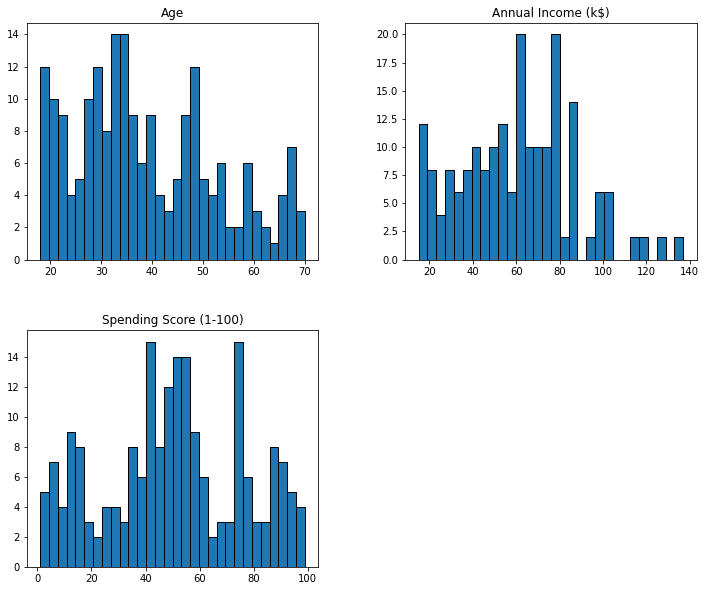

In [18]:
data.hist(grid = False , bins = 30, figsize = (12,10), edgecolor ='black')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

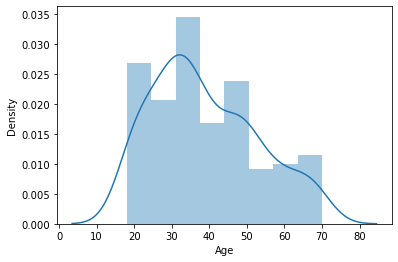

In [12]:
sns.distplot(data["Age"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

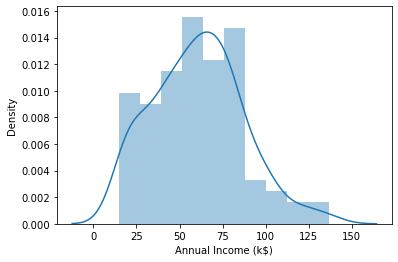

In [13]:
sns.distplot(data["Annual Income (k$)"])   

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

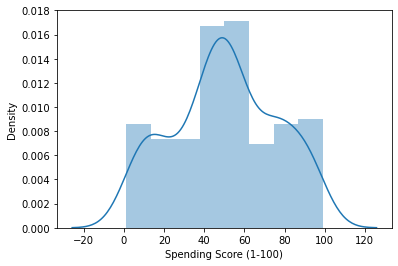

In [14]:
sns.distplot(data["Spending Score (1-100)"])       

#### From the above distribution plots, it is observed that
- People of age around **30 - 33** are having high density
- Majority of people are having an annual income of **70k$**
- Most people have a spending score of **50**

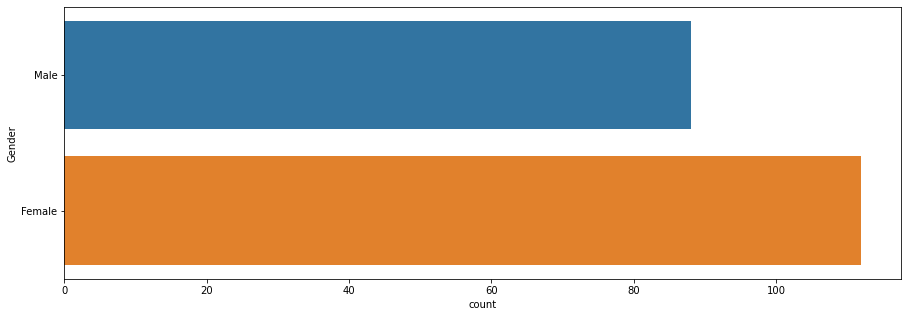

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data = data)
plt.show()

- From the count plot we infer that, there are more females than compared to men

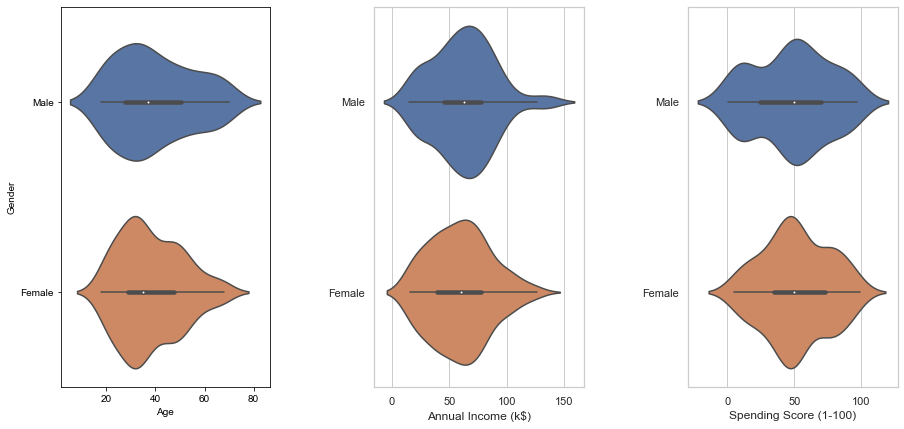

In [15]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style = "whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = data)
    plt.ylabel('Gender' if n == 1 else "")
plt.show()

### The violin plot allows us to deduce the following.

- We have a high density in our **30s**, and more women than males are there.
- In both genders, there is a large population of people in their **65's**.
- At **45** for females and **50** for males, we have a high density.

### Age group & No of Customers

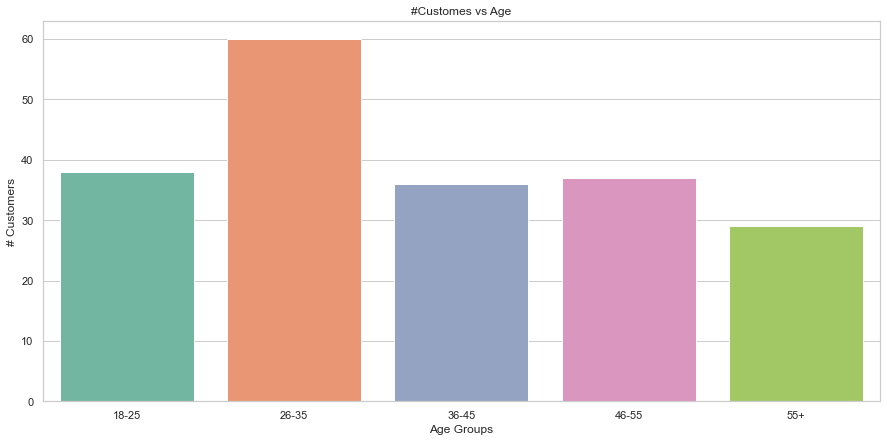

In [16]:
##Creating Age bins/Labelling
age_18_25 = data.Age[(data.Age >= 18) & (data.Age <= 25)]
age_26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age_36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age_46_55 = data.Age[(data.Age >= 46) & (data.Age <= 55)]
age_55above = data.Age[(data.Age >= 56)]

##Axis mapping
age_x = ["18-25", "26-35","36-45","46-55","55+"]
age_y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

##Graph Plotting
plt.figure(figsize=(15,7))
sns.barplot(x = age_x, y = age_y, palette = "Set2")
plt.title("#Customes vs Age")
plt.xlabel("Age Groups")
plt.ylabel("# Customers")
plt.show()

### Relation b/w Annual Income & Spending Score

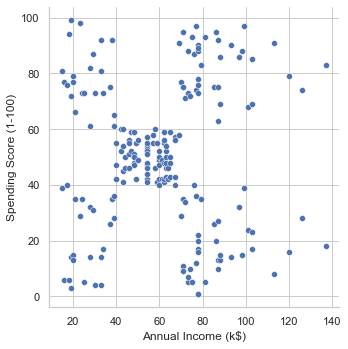

In [17]:
sns.relplot(x = "Annual Income (k$)",y = "Spending Score (1-100)", data = data)
plt.show()

- No much relationship between 20 - 40 and 65 - 140 (k$)
- Customers having income ranging 40 - 65 have a typical spending score lies between 40 - 60 

### Spending Score & No of Customers 

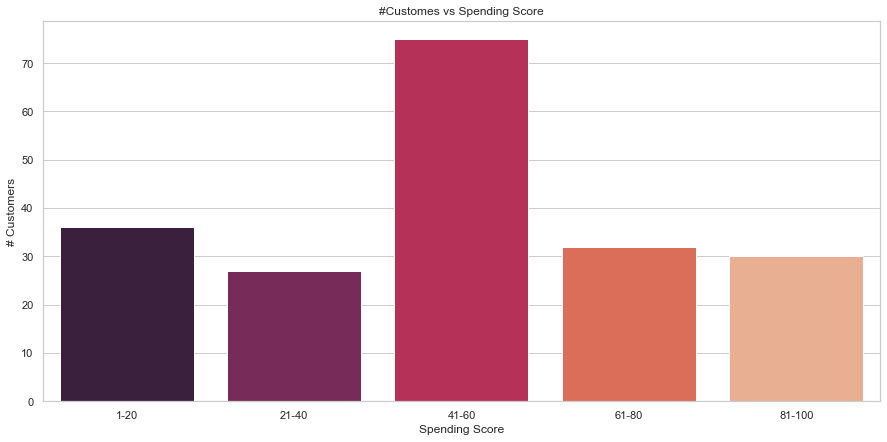

In [18]:
ss_1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss_21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss_41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss_61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss_81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]


ss_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ss_y = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,7))
sns.barplot(x = ss_x, y = ss_y, palette = "rocket")
plt.title("#Customes vs Spending Score")
plt.xlabel("Spending Score")
plt.ylabel("# Customers")
plt.show()

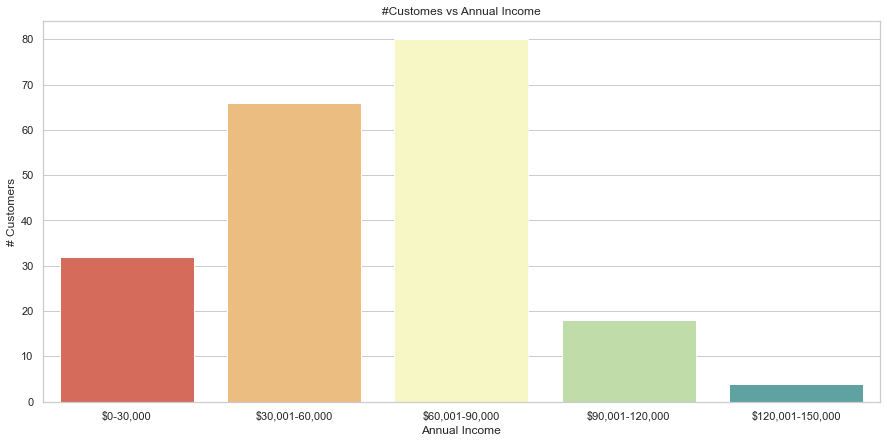

In [19]:
AI_0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
AI_31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
AI_61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
AI_91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
AI_121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

AI_x = ["$0-30,000", "$30,001-60,000", "$60,001-90,000", "$90,001-120,000", "$120,001-150,000"]
AI_y = [len(AI_0_30.values), len(AI_31_60.values), len(AI_61_90.values), len(AI_91_120.values), len(AI_121_150.values)]

plt.figure(figsize=(15,7))
sns.barplot(x = AI_x, y = AI_y, palette = "Spectral")
plt.title("#Customes vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("# Customers")
plt.show()

## K Means Clustering

### Calculating Optimum No of Clusters for Age & Spending Score

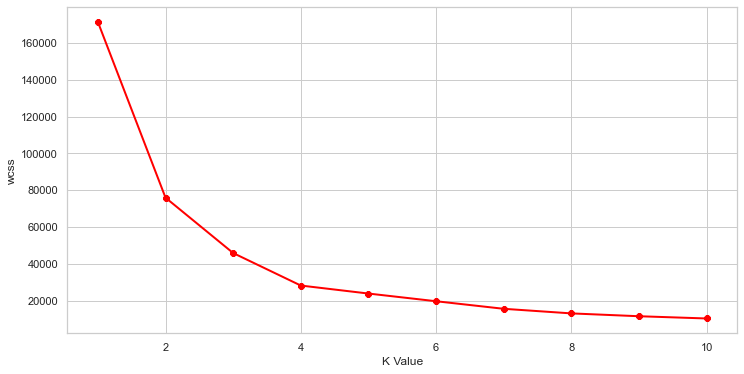

In [20]:
X1 = data.loc[:,["Age","Spending Score (1-100)"]].values

wcss = []                         
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

#### WCSS - Within Cluster Sum of Squares method, used to find the optimal no of culsters by measure of the variability of the observations within each cluster

- From the graph its observed the optimal no of culsters is **"4"**

In [21]:
kmeans = KMeans(n_clusters=4)                      ##Clustering data based on optimal no of clusters

label = kmeans.fit_predict(X1)

In [22]:
label                                              ##Data is clustered into 4 groups (0,1,2,3)

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3,
       0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [23]:
print(kmeans.cluster_centers_)                     ##Calculating Centroid for each group/cluster

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


### Plotting clustered customers using optimal cluster count

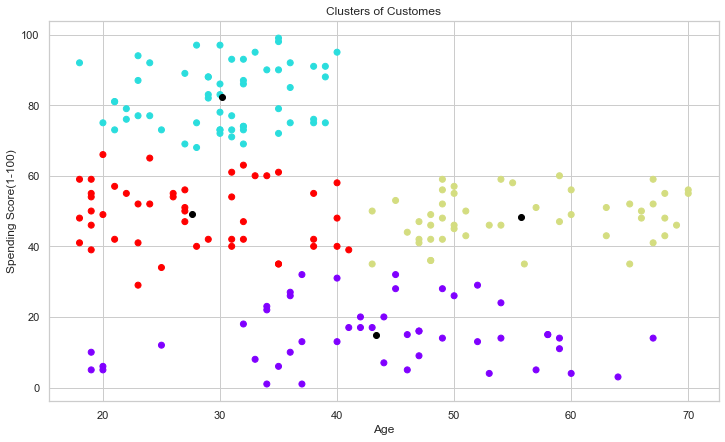

In [24]:
plt.figure(figsize = (12,7))
plt.scatter(X1[:,0], X1[:,1], c = kmeans.labels_, cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black")
plt.title("Clusters of Customes")
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.show()

- Here 4 diiferent colors represents 4 different clusters (0,1,2,3)
- **"Black Dot"** represents the centroid/center of that respective cluster

### Calculating Optimum No of Clusters for Annual Income & Spending Score

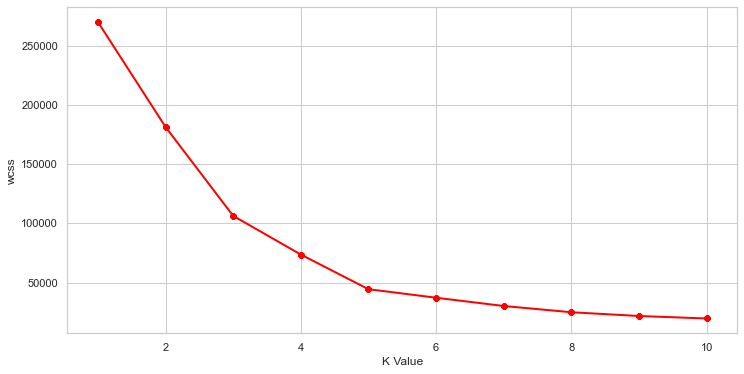

In [25]:
X2 = data.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

- From the graph its observed the optimal no of culsters is **"5"**

In [26]:
kmeans = KMeans(n_clusters=5)                        ##Clustering data based on optimal no of clusters

label = kmeans.fit_predict(X2)

In [27]:
label                                              ##Data is clustered into 4 groups (0,1,2,3,4)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [28]:
print(kmeans.cluster_centers_)                     ##Calculating Centroid for each group/cluster

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


### Plotting clustered customers using optimal cluster count

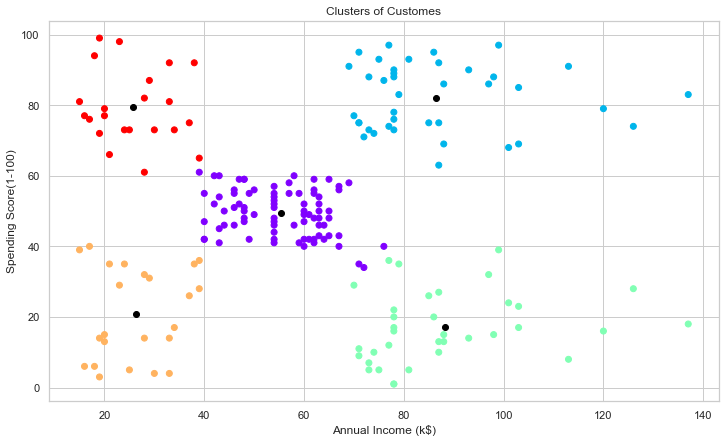

In [29]:
plt.figure(figsize = (12,7))
plt.scatter(X2[:,0], X2[:,1], c = kmeans.labels_, cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black")
plt.title("Clusters of Customes")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score(1-100)")
plt.show()

### Calculating Optimum No of Clusters for Age, Annual Income & Spending Score

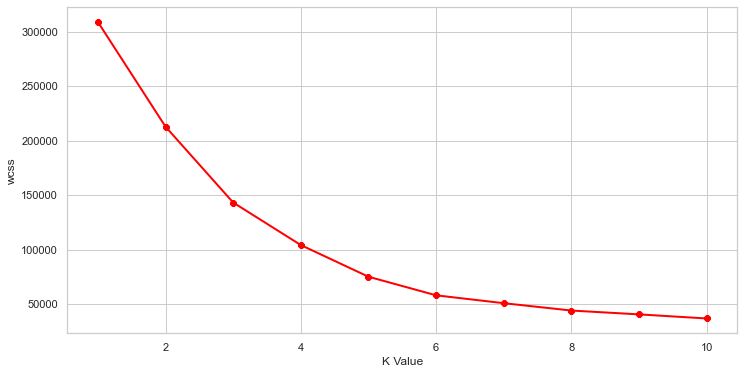

In [30]:
X3 = data.iloc[:,1:]

wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

 - From the graph its observed the optimal no of culsters is **"6"**

In [31]:
kmeans = KMeans(n_clusters=6)                       

label = kmeans.fit_predict(X3)

In [32]:
label

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 1,
       3, 4, 5, 1, 1, 1, 5, 1, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 1,
       5, 5, 1, 1, 5, 5, 5, 5, 5, 1, 5, 1, 1, 5, 5, 1, 5, 5, 1, 5, 5, 1,
       1, 5, 5, 1, 5, 1, 1, 1, 5, 1, 5, 1, 1, 5, 5, 1, 5, 1, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [33]:
print(kmeans.cluster_centers_)                     ##Calculating Centroid for each group/cluster (3variables = 3 values)

[[32.69230769 86.53846154 82.12820513]
 [27.         56.65789474 49.13157895]
 [41.68571429 88.22857143 17.28571429]
 [44.14285714 25.14285714 19.52380952]
 [25.27272727 25.72727273 79.36363636]
 [56.15555556 53.37777778 49.08888889]]


### Plotting clustered customers using optimal cluster count

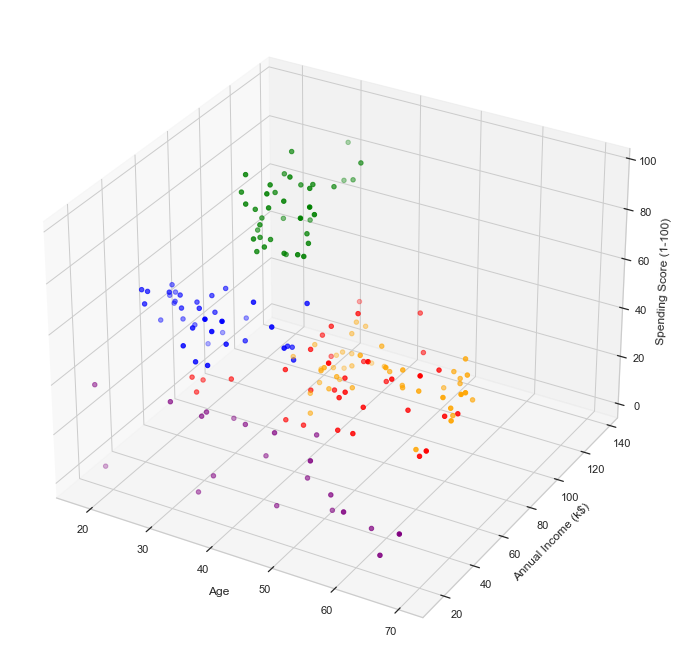

In [34]:
clusters = kmeans.fit_predict(X3)
data["label"] = clusters

fig = plt.figure(figsize = (25,12))
ax = fig.add_subplot(111, projection = "3d")

ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], 
           data["Spending Score (1-100)"][data.label == 0], color = 'blue')
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], 
           data["Spending Score (1-100)"][data.label == 1], color = 'red')
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], 
           data["Spending Score (1-100)"][data.label == 2], color = 'green')
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], 
           data["Spending Score (1-100)"][data.label == 3], color = 'orange')
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], 
           data["Spending Score (1-100)"][data.label == 4], color = 'purple')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

### Conclusion:

- The green-colored group of persons (those between the ages of **18 and 21** with an annual income of **at least 140k dollars** and a spending score between **40 and 60**) are the ones who mostly shop at malls.

# <h1><center><font color='Red'>THE END</font> </center></h1>